**<font color=green><h3>Machine Learning Models</h3></font>**

**<font color=blue>Reading Data from File and Storing into SQL Table</font>**

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

import sqlite3
from sqlalchemy import create_engine #database_connection_

In [10]:
#creating_database_file_from_csv
disk_engine = create_engine('sqlite:///train.db')
start = dt.datetime.now() #
chunksize = 180000
j = 0
index_start = 1
for data in pd.read_csv('final_quora.csv', names=['Unnamed: 0', 'id', 'is_duplicate', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
       'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'longest_substr_ratio', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total',
       'word_share', 'freq_q1+q2', 'freq_q1-q2', '0_x', '1_x', '2_x',
       '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x',
       '12_x', '13_x', '14_x', '15_x', '16_x', '17_x', '18_x', '19_x',
       '20_x', '21_x', '22_x', '23_x', '24_x', '25_x', '26_x', '27_x',
       '28_x', '29_x', '30_x', '31_x', '32_x', '33_x', '34_x', '35_x',
       '36_x', '37_x', '38_x', '39_x', '40_x', '41_x', '42_x', '43_x',
       '44_x', '45_x', '46_x', '47_x', '48_x', '49_x', '50_x', '51_x',
       '52_x', '53_x', '54_x', '55_x', '56_x', '57_x', '58_x', '59_x',
       '60_x', '61_x', '62_x', '63_x', '64_x', '65_x', '66_x', '67_x',
       '68_x', '69_x', '70_x', '71_x', '72_x', '73_x', '74_x', '75_x',
       '76_x', '77_x', '78_x', '79_x', '80_x', '81_x', '82_x', '83_x',
       '84_x', '85_x', '86_x', '87_x', '88_x', '89_x', '90_x', '91_x',
       '92_x', '93_x', '94_x', '95_x', '0_y', '1_y', '2_y', '3_y', '4_y',
       '5_y', '6_y', '7_y', '8_y', '9_y', '10_y', '11_y', '12_y', '13_y',
       '14_y', '15_y', '16_y', '17_y', '18_y', '19_y', '20_y', '21_y',
       '22_y', '23_y', '24_y', '25_y', '26_y', '27_y', '28_y', '29_y',
       '30_y', '31_y', '32_y', '33_y', '34_y', '35_y', '36_y', '37_y',
       '38_y', '39_y', '40_y', '41_y', '42_y', '43_y', '44_y', '45_y',
       '46_y', '47_y', '48_y', '49_y', '50_y', '51_y', '52_y', '53_y',
       '54_y', '55_y', '56_y', '57_y', '58_y', '59_y', '60_y', '61_y',
       '62_y', '63_y', '64_y', '65_y', '66_y', '67_y', '68_y', '69_y',
       '70_y', '71_y', '72_y', '73_y', '74_y', '75_y', '76_y', '77_y',
       '78_y', '79_y', '80_y', '81_y', '82_y', '83_y', '84_y', '85_y',
       '86_y', '87_y', '88_y', '89_y', '90_y', '91_y', '92_y', '93_y',
       '94_y', '95_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
    
    data.index += index_start
    j+=1
    print('{} rows'.format(j*chunksize))
    data.to_sql('data', disk_engine, if_exists='append')
    index_start = data.index[-1] + 1

180000 rows


In [11]:
#ref:_http://www.sqlitetutorial.net/sqlite-python/create-tables/

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [12]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [14]:
#try_to_sample_data_according_to_the_computing_power
import os

if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        #_for_selecting_random_points
        data = pd.read_sql_query("SELECT * From data;", conn_r) #"SELECT * From data ORDER BY RANDOM() LIMIT 100001;
        conn_r.commit()
        conn_r.close()

In [15]:
#_remove_the_first_row_

data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [16]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.999980000399992,0.8333194446759221,0.9999833336111064,0.9999833336111064,0.9166590278414348,0.7857086735094749,0.0,1.0,2.0,13.0,...,23.76825027167797,-20.440071880817413,-25.349166497588158,12.486474052071571,-19.637780040502548,16.586845815181732,30.42620912194252,43.3457567691803,5.500876009464264,2.2623480558395386
2,0.7999840003199936,0.3999960000399996,0.7499812504687383,0.5999880002399952,0.6999930000699993,0.4666635555762962,0.0,1.0,5.0,12.5,...,63.48698341846466,0.21716612577438354,-24.077536888420582,-5.16056339815259,-23.868522435426712,4.3169752061367035,2.1708393692970276,41.508874736726284,10.780357360839844,21.472071304917336
3,0.3999920001599968,0.3333277778703688,0.3999920001599968,0.24999687503906198,0.3999960000399996,0.28571224491253633,0.0,1.0,4.0,12.0,...,-10.4096200466156,-35.57620549201965,-20.263143956661224,39.94573229551315,-22.443190425634384,12.674661040306091,0.09520073235034943,21.34302520751953,24.57832145690918,-7.446970224380493
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,...,6.468349575996399,-21.470735728740692,0.5468772947788239,40.3733349442482,-9.026010990142822,18.770623445510864,-1.5563985109329224,1.3486743569374084,18.06006595492363,17.89223536849022
5,0.3999920001599968,0.19999800001999984,0.9999500024998748,0.6666444451851604,0.5714204082798817,0.3076899408466089,0.0,1.0,6.0,10.0,...,17.49354112148285,-11.318888233043253,-11.371670164167881,14.175069153308868,-32.5538332760334,6.133713513612747,20.308695316314697,17.38372352719307,12.348763644695282,-12.703654170036316


**<font color=blue><h3>Converting Strings to Numerics</h3></font>**
- After reading data from sql table each entry was read it as a string; we convert all the features into numaric before we apply any model.

In [17]:
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [18]:
#convert_all_strings_in_a_list_to_int_
#ref:_https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

**<font color=blue><h3>Random Train Test Split (70:30)</h3></font>**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [20]:
print("NUMBER OF DATA POINTS IN TRAIN DATA: ",X_train.shape)
print("NUMBER OF DATA POINTS IN TEST DATA: ",X_test.shape)

NUMBER OF DATA POINTS IN TRAIN DATA:  (35000, 218)
NUMBER OF DATA POINTS IN TEST DATA:  (15000, 218)


In [23]:
from collections import Counter

print("-"*10, "DISTRIBUTION OF OUTPUT VARIABLE IN TRAIN DATA", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len,"\n")

print("-"*10, "DISTRIBUTION OF OUTPUT VARIABLE IN TEST DATA", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- DISTRIBUTION OF OUTPUT VARIABLE IN TRAIN DATA ----------
Class 0:  0.6270285714285714 Class 1:  0.37297142857142856 

---------- DISTRIBUTION OF OUTPUT VARIABLE IN TEST DATA ----------
Class 0:  0.373 Class 1:  0.373


In [93]:
#this_function_plots_the_confusion_matrices_given_y_i_(true_labels), y_i_hat_(predicted_labels).
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    labels = [0,1]
    
    cmap=sns.light_palette("#2ecc71")
    
    plt.subplot(1,3,1)
    #representing_C_in_heatmap_format
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1,3,2)
    #representing_B_in_heatmap_format
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    #representing_A_in_heatmap_format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.savefig('cm.png')
    plt.show()

**<font color=blue><h3>Building a Random Model (Finding Worst-Case Log-Loss)</h3></font>**

Log-Loss on Test Data using Random Model - 0.8826696876931132


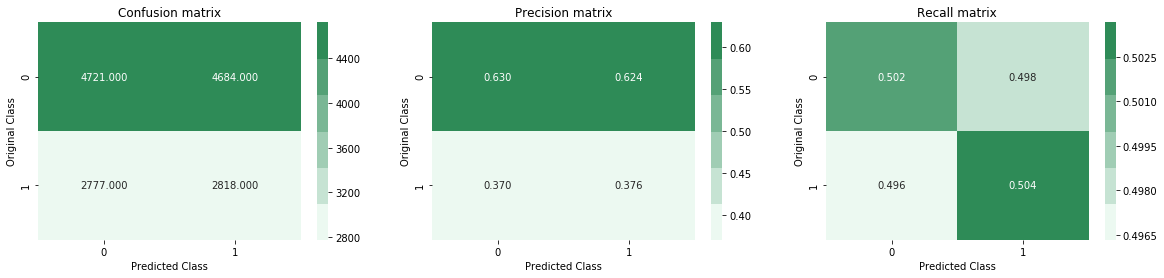

In [40]:
from sklearn.metrics import accuracy_score, log_loss
#we_need_to_generate_9_numbers_and_the_sum_of_numbers_should_be_1_
#one_solution_is_to_genarate_9_numbers_and_divide_each_of_the_numbers_by_their_sum_

#ref: https://stackoverflow.com/a/18662466/4084039
#we_create_a_output_array_that_has_exactly_same_size_as_the_CV_data_
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log-Loss on Test Data using Random Model -",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

**<font color=blue><h3>Logistic Regression with Hyperparameter Tuning</h3></font>**

FOR VALUES OF ALPHA =  1e-05 LOG LOSS IS:  0.49654685488456696
FOR VALUES OF ALPHA =  0.0001 LOG LOSS IS:  0.49380219976152245
FOR VALUES OF ALPHA =  0.001 LOG LOSS IS:  0.4949909248786381
FOR VALUES OF ALPHA =  0.01 LOG LOSS IS:  0.482925357093655
FOR VALUES OF ALPHA =  0.1 LOG LOSS IS:  0.4978345558275487
FOR VALUES OF ALPHA =  1 LOG LOSS IS:  0.5232445444029195
FOR VALUES OF ALPHA =  10 LOG LOSS IS:  0.5455059917104451


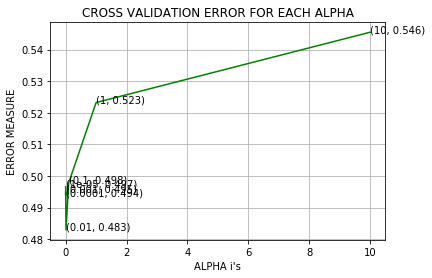

FOR VALUES OF BEST ALPHA =  0.01 TRAIN LOG LOSS IS:  0.4800758003928714
FOR VALUES OF BEST ALPHA =  0.01 TEST LOG LOSS IS: 0.482925357093655
TOTAL NUMBER OF DATA POINTS:  15000


In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

alpha = [10 ** x for x in range(-5, 2)] #hyperparameter_for_SGDclassifier_

#ref_:_http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

log_error_array=[]

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    #SGDClassifier_with_'l2'_penalty_and_'log'_loss_>>_logistic_regression_
    clf.fit(X_train, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('FOR VALUES OF ALPHA =', i, "LOG LOSS IS: ",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')

for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
    
plt.grid()
plt.title("CROSS VALIDATION ERROR FOR EACH ALPHA")
plt.xlabel("ALPHA i's")
plt.ylabel("ERROR MEASURE")

plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('FOR VALUES OF BEST ALPHA =', alpha[best_alpha], "TRAIN LOG LOSS IS: ",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('FOR VALUES OF BEST ALPHA =', alpha[best_alpha], "TEST LOG LOSS IS:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y = np.argmax(predict_y,axis=1)
print("TOTAL NUMBER OF DATA POINTS: ", len(predicted_y))

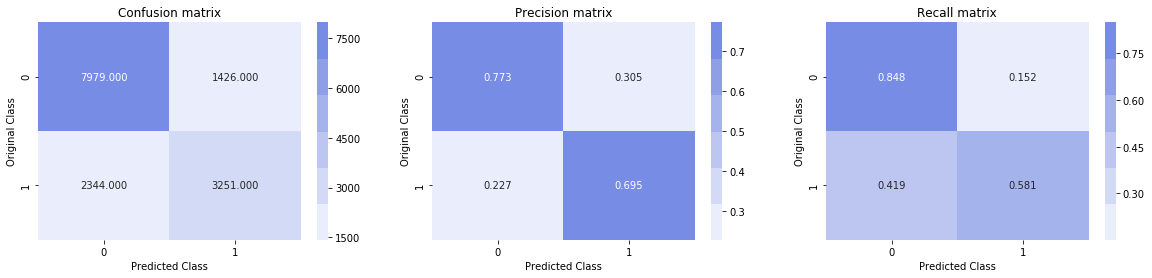

In [46]:
plot_confusion_matrix(y_test, predicted_y)

**<font color=blue><h3>Linear SVM with Hyperparameter Tuning</h3></font>**

FOR VALUES OF ALPHA =  1e-05 LOG LOSS IS:  0.5071704235676304
FOR VALUES OF ALPHA =  0.0001 LOG LOSS IS:  0.5085132652154267
FOR VALUES OF ALPHA =  0.001 LOG LOSS IS:  0.5246881379786456
FOR VALUES OF ALPHA =  0.01 LOG LOSS IS:  0.5432954728978588
FOR VALUES OF ALPHA =  0.1 LOG LOSS IS:  0.5301794992713046
FOR VALUES OF ALPHA =  1 LOG LOSS IS:  0.6360956942361801
FOR VALUES OF ALPHA =  10 LOG LOSS IS:  0.6510421907973826


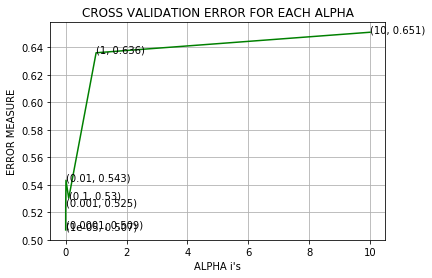

FOR VALUES OF BEST ALPHA = 1e-05 TRAIN LOG LOSS IS:  0.5026956580808021
FOR VALUES OF BEST ALPHA = 1e-05 TEST LOG LOSS IS:  0.5071704235676304
TOTAL NUMBER OF DATA POINTS:  15000


In [48]:
alpha = [10 ** x for x in range(-5, 2)] #hyperparameter_for_SGDclassifier_

log_error_array=[]

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    #SGDClassifier_with_'l1'_penalty_and_'hinge'_loss_>>_linear_svm_
    clf.fit(X_train, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('FOR VALUES OF ALPHA =', i, "LOG LOSS IS: ",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')

for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
    
plt.grid()
plt.title("CROSS VALIDATION ERROR FOR EACH ALPHA")
plt.xlabel("ALPHA i's")
plt.ylabel("ERROR MEASURE")

plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('FOR VALUES OF BEST ALPHA =', alpha[best_alpha], "TRAIN LOG LOSS IS: ",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('FOR VALUES OF BEST ALPHA =', alpha[best_alpha], "TEST LOG LOSS IS: ",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y = np.argmax(predict_y,axis=1)
print("TOTAL NUMBER OF DATA POINTS: ", len(predicted_y))

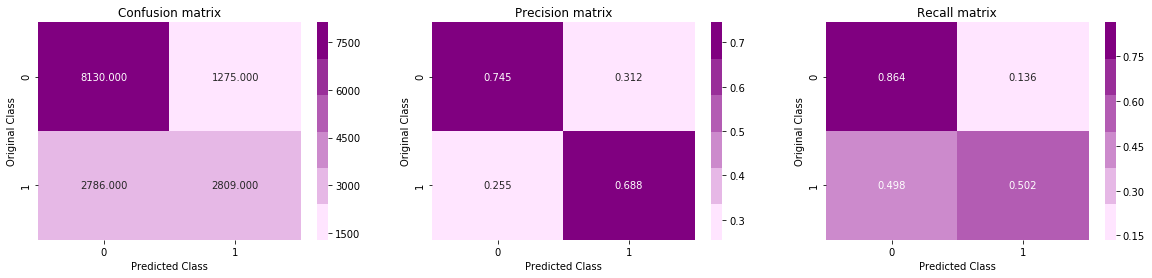

In [51]:
plot_confusion_matrix(y_test, predicted_y)

**<font color=blue><h3>LightGBM</h3></font>**

In [53]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

#build_the_lightgbm_model
gbdt_set = lgb.LGBMClassifier()
params = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators':[5, 10, 50, 75, 100, 200]}

clf_set = GridSearchCV(gbdt_set, params, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf_set.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [5, 10, 50, 75, 100, 200]},
             return_train_score=True, scoring='roc_auc')

In [54]:
print("Best Hyper_Parameter :",clf_set.best_params_['learning_rate'])
print("Best Score: ",clf_set.best_score_)
print("Best n_estimators: ",clf_set.best_params_['n_estimators'])

Best Hyper_Parameter : 0.1
Best Score:  0.8900322279325273
Best n_estimators:  200


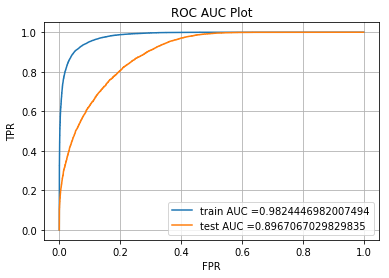

In [56]:
from sklearn.metrics import roc_curve, auc

y_train_pred = clf_set.predict_proba(X_train)[:,1]  
y_test_pred = clf_set.predict_proba(X_test)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

#store_the_auc_value_of_train_and_test_for_further_step_
train_auc_set = auc(train_fpr, train_tpr)
test_auc_set = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Plot")
plt.grid()
plt.show()

In [57]:
print("Train AUC Score",train_auc_set)
print("Test AUC Score",test_auc_set)

Train AUC Score 0.9824446982007494
Test AUC Score 0.8967067029829835


In [89]:
t = test_thresholds[np.argmax(test_fpr*(1-test_tpr))]
#this_will_be_maximum_if_fpr_is_very_low_and_tpr_is_very_high
    
print("Maximum Value of test_tpr*(1-test_fpr)", max(test_tpr*(1-test_fpr)), "for threshold", np.round(t,3))

pred_y = []
for i in y_test_pred:
    if i>=t:
        pred_y.append(1)
    else:
        pred_y.append(0)

Maximum Value of test_tpr*(1-test_fpr) 0.650672930328638 for threshold 0.506


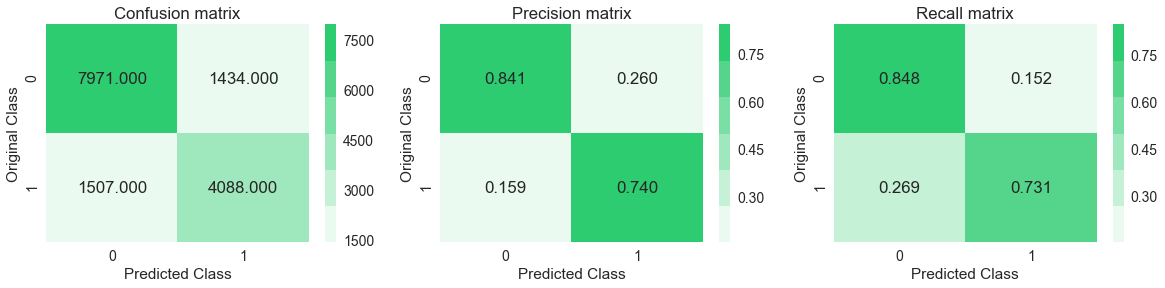

In [94]:
plot_confusion_matrix(y_test, pred_y)

**<font color=blue><h3>XGBoost</h3></font>**

In [82]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)

[0]	train-logloss:0.68605	valid-logloss:0.68602
[10]	train-logloss:0.62637	valid-logloss:0.62643
[20]	train-logloss:0.58320	valid-logloss:0.58381
[30]	train-logloss:0.55090	valid-logloss:0.55200
[40]	train-logloss:0.52625	valid-logloss:0.52782
[50]	train-logloss:0.50679	valid-logloss:0.50888
[60]	train-logloss:0.49133	valid-logloss:0.49383
[70]	train-logloss:0.47877	valid-logloss:0.48174
[80]	train-logloss:0.46849	valid-logloss:0.47175
[90]	train-logloss:0.45998	valid-logloss:0.46359
[100]	train-logloss:0.45312	valid-logloss:0.45716
[110]	train-logloss:0.44723	valid-logloss:0.45162
[120]	train-logloss:0.44210	valid-logloss:0.44689
[130]	train-logloss:0.43762	valid-logloss:0.44268
[140]	train-logloss:0.43364	valid-logloss:0.43901
[150]	train-logloss:0.43036	valid-logloss:0.43607
[160]	train-logloss:0.42730	valid-logloss:0.43338
[170]	train-logloss:0.42466	valid-logloss:0.43105
[180]	train-logloss:0.42222	valid-logloss:0.42893
[190]	train-logloss:0.42000	valid-logloss:0.42708
[200]	train

In [84]:
print("THE TEST LOG IS: ",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

THE TEST LOG IS:  0.405098605657885


In [85]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("TOTAL NUMBER OF DATA POINTS: ", len(predicted_y))

TOTAL NUMBER OF DATA POINTS:  15000


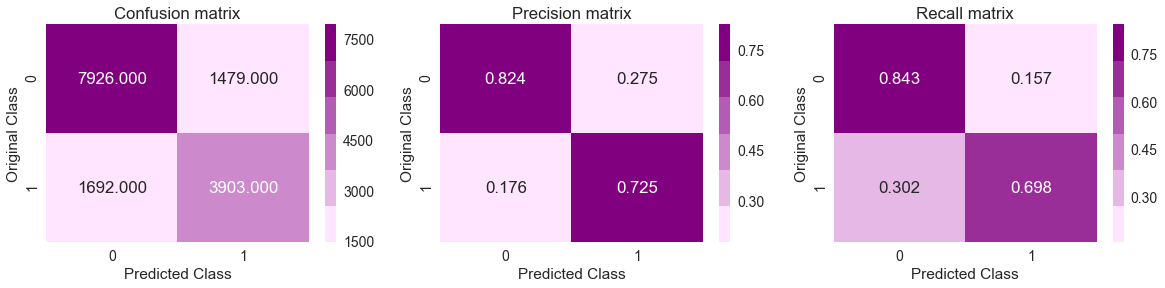

In [86]:
plot_confusion_matrix(y_test, predicted_y)